In [1]:
import pandas as pd
import numpy as np

import requests
from io import StringIO

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

# Problem E

## No missing value

In [14]:
url5 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xaa.dat'
attributes5 = ('COMPACTNESS','CIRCULARITY','DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',
              'ELONGATEDNESS','PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE ALONG MAJOR AXIS','SCALED VARIANCE ALONG MINOR AXIS ','SCALED RADIUS OF GYRATION',
              'SKEWNESS ABOUT MAJOR AXIS', 'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MAJOR AXIS','HOLLOWS RATIO','CLASS')

df5 = pd.read_csv(
    StringIO(requests.get(url5).content.decode('utf-8')), sep="\s+",names = attributes5,header=0)

In [15]:
df5.isnull().sum()

COMPACTNESS                          0
CIRCULARITY                          0
DISTANCE CIRCULARITY                 0
RADIUS RATIO                         0
PR.AXIS ASPECT RATIO                 0
MAX.LENGTH ASPECT RATIO              0
SCATTER RATIO                        0
ELONGATEDNESS                        0
PR.AXIS RECTANGULARITY               0
MAX.LENGTH RECTANGULARITY            0
SCALED VARIANCE ALONG MAJOR AXIS     0
SCALED VARIANCE ALONG MINOR AXIS     0
SCALED RADIUS OF GYRATION            0
SKEWNESS ABOUT MAJOR AXIS            0
SKEWNESS ABOUT MINOR AXIS            0
KURTOSIS ABOUT MINOR AXIS            0
KURTOSIS ABOUT MAJOR AXIS            0
HOLLOWS RATIO                        0
CLASS                                0
dtype: int64

In [16]:
df5 = df5[~(df5 == '?').any(axis = 1)]
df5.iloc[:,:-1] = df5.iloc[:,:-1].astype(int)
df5.iloc[:,:-1] = df5.iloc[:,:-1] / df5.iloc[:,:-1].max() # rescale attributes [0, 1]
df5 = df5.sample(frac = 1, random_state = 7021).reset_index(drop = True)
df5.shape

(93, 19)

In [17]:
url6 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xai.dat'
attributes6 = ('COMPACTNESS','CIRCULARITY','DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',
              'ELONGATEDNESS','PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE ALONG MAJOR AXIS','SCALED VARIANCE ALONG MINOR AXIS ','SCALED RADIUS OF GYRATION',
              'SKEWNESS ABOUT MAJOR AXIS', 'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MAJOR AXIS','HOLLOWS RATIO','CLASS')

df6 = pd.read_csv(
    StringIO(requests.get(url6).content.decode('utf-8')), sep="\s+",names = attributes6,header=0)

## split data

In [18]:
df6 = df6[~(df6 == '?').any(axis = 1)]
df6.iloc[:,:-1] = df6.iloc[:,:-1].astype(int)
df6.iloc[:,:-1] = df6.iloc[:,:-1] / df6.iloc[:,:-1].max() # rescale attributes [0, 1]
df6 = df6.sample(frac = 1, random_state = 7021).reset_index(drop = True)
df6.shape

(93, 19)

In [19]:
index_3=pd.Series(np.arange(186)) 

In [20]:
frames = [df5, df5]
df7 = pd.concat(frames)
df7.index = index_3
df7

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS
0,0.697479,0.711864,0.611111,0.509804,0.531746,0.134615,0.574713,0.789474,0.678571,0.774194,0.621429,0.333667,0.602273,0.614173,0.20,0.052632,0.900990,0.899522,bus
1,0.857143,0.762712,0.787037,0.630719,0.507937,0.115385,0.735632,0.578947,0.785714,0.784946,0.775000,0.571142,0.617424,0.598425,0.30,0.184211,0.965347,0.923445,bus
2,0.789916,0.728814,0.592593,0.565359,0.547619,0.134615,0.574713,0.754386,0.678571,0.763441,0.603571,0.344689,0.670455,0.535433,0.45,0.026316,0.985149,0.985646,bus
3,0.789916,0.610169,0.611111,0.493464,0.484127,0.153846,0.509579,0.877193,0.642857,0.725806,0.550000,0.265531,0.450758,0.488189,0.45,0.078947,0.995050,0.995215,van
4,0.680672,0.728814,0.629630,0.408497,0.452381,0.153846,0.570881,0.807018,0.678571,0.784946,0.603571,0.323647,0.651515,0.653543,0.30,0.473684,0.886139,0.880383,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.747899,0.796610,0.777778,0.434641,0.436508,0.211538,0.601533,0.771930,0.714286,0.860215,0.603571,0.354709,0.666667,0.582677,0.25,0.236842,0.900990,0.918660,van
182,0.672269,0.627119,0.527778,0.379085,0.436508,0.115385,0.478927,0.947368,0.642857,0.672043,0.507143,0.229459,0.500000,0.637795,0.40,0.131579,0.881188,0.880383,opel
183,0.739496,0.711864,0.712963,0.493464,0.460317,0.153846,0.536398,0.824561,0.642857,0.763441,0.589286,0.293587,0.598485,0.503937,0.50,0.289474,0.980198,0.980861,saab
184,0.815126,0.745763,0.888889,0.637255,0.500000,0.173077,0.708812,0.631579,0.785714,0.774194,0.721429,0.513026,0.625000,0.519685,0.20,0.210526,0.945545,0.952153,saab


In [21]:
df7 = df7.replace(['saab','opel'],'car')

In [22]:
df7 = df7.sample(frac = 1, random_state = 7021).reset_index(drop = True)
df7 =df7.replace(['car','bus','van'],[1,2,3])

In [12]:
df7

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS
0,0.747899,0.796610,0.777778,0.434641,0.436508,0.211538,0.601533,0.771930,0.714286,0.860215,0.603571,0.354709,0.666667,0.582677,0.25,0.236842,0.900990,0.918660,3
1,0.672269,0.627119,0.527778,0.379085,0.436508,0.115385,0.478927,0.947368,0.642857,0.672043,0.507143,0.229459,0.500000,0.637795,0.40,0.131579,0.881188,0.880383,1
2,0.731092,0.779661,0.657407,0.519608,0.523810,0.115385,0.578544,0.771930,0.678571,0.784946,0.625000,0.343687,0.715909,0.574803,0.10,0.000000,0.920792,0.909091,2
3,0.890756,0.898305,0.907407,0.575163,0.428571,0.192308,0.827586,0.543860,0.857143,0.919355,0.839286,0.692385,0.825758,0.582677,0.05,0.236842,0.925743,0.942584,1
4,0.773109,0.644068,0.657407,0.568627,0.523810,0.134615,0.590038,0.754386,0.678571,0.715054,0.646429,0.355711,0.492424,0.551181,0.20,0.631579,0.935644,0.933014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.747899,0.796610,0.777778,0.434641,0.436508,0.211538,0.601533,0.771930,0.714286,0.860215,0.603571,0.354709,0.666667,0.582677,0.25,0.236842,0.900990,0.918660,3
182,0.655462,0.644068,0.583333,0.375817,0.404762,0.115385,0.544061,0.824561,0.678571,0.698925,0.578571,0.299599,0.553030,0.606299,0.10,0.105263,0.896040,0.885167,1
183,0.739496,0.711864,0.712963,0.493464,0.460317,0.153846,0.536398,0.824561,0.642857,0.763441,0.589286,0.293587,0.598485,0.503937,0.50,0.289474,0.980198,0.980861,1
184,0.731092,0.661017,0.648148,0.483660,0.484127,0.134615,0.547893,0.807018,0.642857,0.731183,0.585714,0.307615,0.534091,0.543307,0.05,0.052632,0.950495,0.952153,2


In [13]:
N_train7 = round(0.75 * df7.shape[0])
N_train7

140

In [14]:
X = df7.iloc[:,:-1]
y = df7.iloc[:, -1]
X_train7 = X.iloc[0:N_train7,:]
X_test7= X.iloc[N_train7:,:]
y_train7 = y.iloc[:N_train7]
y_test7= y.iloc[N_train7:]

In [15]:
N7, P7 = X_train7.shape

## cross validation

[1, 2, 3, 4, 5] [0.5372340425531915, 0.6666281221091582, 0.8603145235892691, 0.9355920444033303, 0.9354764107308048]


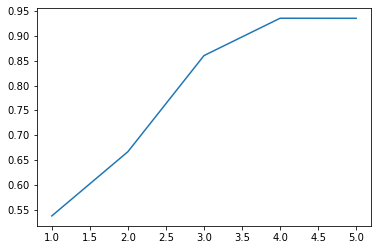

when depth = 4 the best accuracy is 0.9355920444033303


In [262]:
## cross validation for depth
%matplotlib inline 
from sklearn.model_selection import cross_val_score

score_list = []
depths = []

for dep in range(1,6):
    depths.append(dep)
    clf_cross = DecisionTreeClassifier(
        max_depth = dep, max_leaf_nodes = 2**dep, random_state = 7021)
    scores = cross_val_score(clf_cross, X, y, cv=4)
    score_list.append(scores.mean())

print(depths,score_list)

plt.plot(depths,score_list)
plt.show()

print("when depth =",score_list.index(max(score_list))+1, 'the best accuracy is',max(score_list))

From the plot, we can see that the score is highest when depth=4

## CART

In [16]:
depth7 = 4

In [17]:
clf7 = DecisionTreeClassifier(
    max_depth = depth7, max_leaf_nodes = 2**depth7, random_state = 7021)
clf7.fit(X_train7, y_train7)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=16, random_state=7021)

<IPython.core.display.Javascript object>


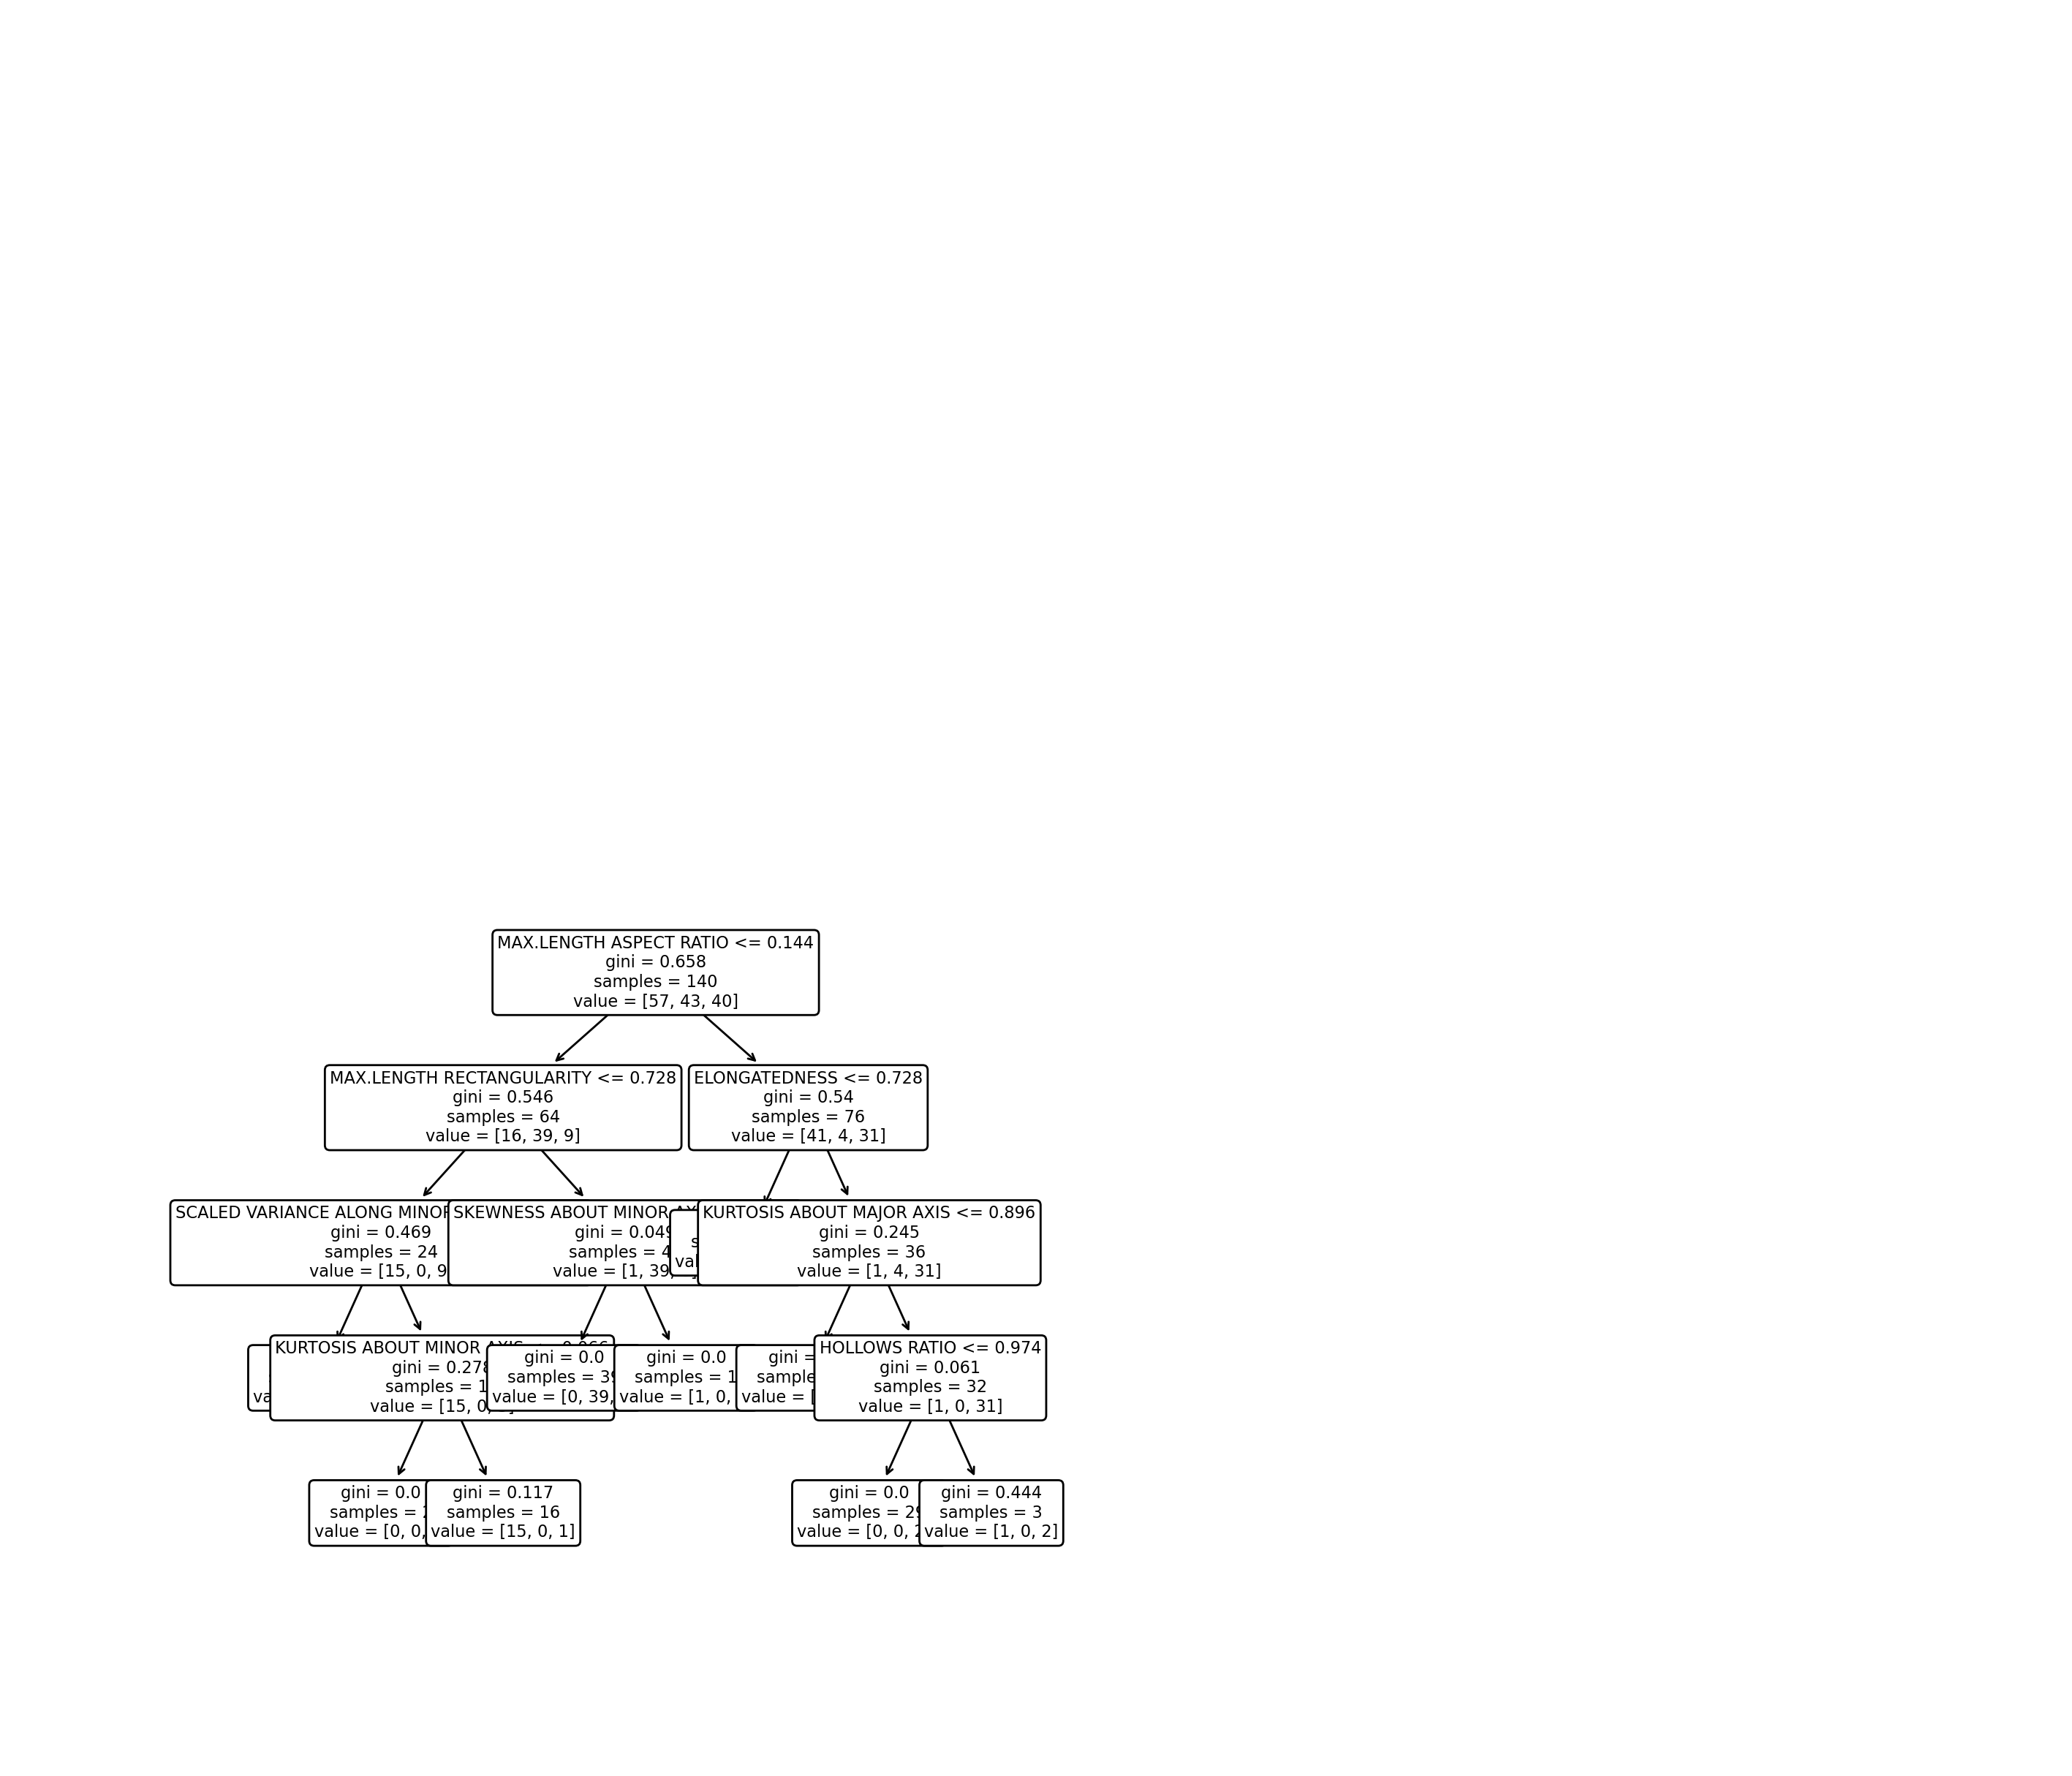

In [18]:
fig7 = plt.figure(figsize = (14, 12))
_ = plot_tree(
    clf7, filled = False, fontsize = 8, rounded = True, 
    feature_names = attributes6[0:-1])
fig7.savefig('CART.png')

In [19]:
print(export_text(clf7, feature_names = attributes6[0:-1]))

|--- MAX.LENGTH ASPECT RATIO <= 0.14
|   |--- MAX.LENGTH RECTANGULARITY <= 0.73
|   |   |--- SCALED VARIANCE ALONG MINOR AXIS  <= 0.22
|   |   |   |--- class: 3
|   |   |--- SCALED VARIANCE ALONG MINOR AXIS  >  0.22
|   |   |   |--- KURTOSIS ABOUT MINOR AXIS <= 0.07
|   |   |   |   |--- class: 3
|   |   |   |--- KURTOSIS ABOUT MINOR AXIS >  0.07
|   |   |   |   |--- class: 1
|   |--- MAX.LENGTH RECTANGULARITY >  0.73
|   |   |--- SKEWNESS ABOUT MINOR AXIS <= 0.77
|   |   |   |--- class: 2
|   |   |--- SKEWNESS ABOUT MINOR AXIS >  0.77
|   |   |   |--- class: 1
|--- MAX.LENGTH ASPECT RATIO >  0.14
|   |--- ELONGATEDNESS <= 0.73
|   |   |--- class: 1
|   |--- ELONGATEDNESS >  0.73
|   |   |--- KURTOSIS ABOUT MAJOR AXIS <= 0.90
|   |   |   |--- class: 2
|   |   |--- KURTOSIS ABOUT MAJOR AXIS >  0.90
|   |   |   |--- HOLLOWS RATIO <= 0.97
|   |   |   |   |--- class: 3
|   |   |   |--- HOLLOWS RATIO >  0.97
|   |   |   |   |--- class: 3



In [20]:
def find_path(root, path, x, children_left, children_right):
    path.append(root)
    if root == x:
        return True
    left = False
    right = False
    if (children_left[root] != -1):
        left = find_path(children_left[root], path, x, children_left, children_right)
    if (children_right[root] != -1):
        right = find_path(children_right[root], path, x, children_left, children_right)
    if left or right:
        return True
    path.remove(root)
    return False

def get_rule(path, children_left, attributes, feature, threshold):
    mask = ''
    for idx, node in enumerate(path):
        # filter out the leaf node
        if idx != len(path) - 1:
            # left or right branch node
            if (children_left[node] == path[idx + 1]):
                mask += "('{}' <= {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
            else:
                mask += "('{}' > {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "").strip()
    return mask

In [21]:
children_left7 = clf7.tree_.children_left
children_right7 = clf7.tree_.children_right
feature7 = clf7.tree_.feature
threshold7 = clf7.tree_.threshold

In [22]:
leaf_id7 = np.unique(clf7.apply(X_train7))

paths7 = {}
for leaf in leaf_id7:
    path_leaf7 = []
    find_path(0, path_leaf7, leaf, children_left7, children_right7)
    paths7[leaf] = path_leaf7

CART_rules7 = {}
for leaf in paths7:
    CART_rules7[leaf] = get_rule(paths7[leaf], children_left7, attributes6[0:-1], feature7, threshold7)

### Decision rules of CART

In [23]:
CART_rules7

{3: "('MAX.LENGTH ASPECT RATIO' > 0.14) & ('ELONGATEDNESS' <= 0.73)",
 7: "('MAX.LENGTH ASPECT RATIO' > 0.14) & ('ELONGATEDNESS' > 0.73) & ('KURTOSIS ABOUT MAJOR AXIS' <= 0.90)",
 9: "('MAX.LENGTH ASPECT RATIO' <= 0.14) & ('MAX.LENGTH RECTANGULARITY' <= 0.73) & ('SCALED VARIANCE ALONG MINOR AXIS ' <= 0.22)",
 11: "('MAX.LENGTH ASPECT RATIO' <= 0.14) & ('MAX.LENGTH RECTANGULARITY' <= 0.73) & ('SCALED VARIANCE ALONG MINOR AXIS ' > 0.22) & ('KURTOSIS ABOUT MINOR AXIS' <= 0.07)",
 12: "('MAX.LENGTH ASPECT RATIO' <= 0.14) & ('MAX.LENGTH RECTANGULARITY' <= 0.73) & ('SCALED VARIANCE ALONG MINOR AXIS ' > 0.22) & ('KURTOSIS ABOUT MINOR AXIS' > 0.07)",
 13: "('MAX.LENGTH ASPECT RATIO' <= 0.14) & ('MAX.LENGTH RECTANGULARITY' > 0.73) & ('SKEWNESS ABOUT MINOR AXIS' <= 0.77)",
 14: "('MAX.LENGTH ASPECT RATIO' <= 0.14) & ('MAX.LENGTH RECTANGULARITY' > 0.73) & ('SKEWNESS ABOUT MINOR AXIS' > 0.77)",
 15: "('MAX.LENGTH ASPECT RATIO' > 0.14) & ('ELONGATEDNESS' > 0.73) & ('KURTOSIS ABOUT MAJOR AXIS' > 0.9

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
total_nodes7 = clf7.tree_.node_count
leaf_nodes7 = round(total_nodes7 / 2)
branch_nodes7 = total_nodes7 // 2


In [26]:
branch_nodes7

8

In [28]:
initial_a7 = np.array([i for i in clf7.tree_.feature if i != -2])
initial_a7 

array([ 5,  9,  7, 16, 11, 14, 17, 15], dtype=int64)

In [29]:
initial_a7=np.array([ 5,  9,  7, 16,0, 11,0, 14,0,0,0,0,0, 17, 15])

In [30]:
initial_b7 = np.array([i for i in clf7.tree_.threshold if i != -2])
initial_b7 

array([0.14423078, 0.72849464, 0.72807017, 0.89603961, 0.2239479 ,
       0.77499998, 0.97368422, 0.06578947])

In [31]:
initial_b7= np.array([0.14423078, 0.72849464, 0.72807017, 0.89603961,0, 0.2239479 ,0,
       0.77499998,0,0,0,0,0, 0.97368422, 0.06578947])

### in-sample performance of CART

In [32]:
clf7.score(X_train7, y_train7)

0.9857142857142858

### out-of sample performance of CART

In [33]:
clf7.score(X_test7, y_test7)

0.9565217391304348

## OCT

For OCT, I have tried different hyper-parameters using cross-validation for 5 alpha values (from 0.3-0.7), 3 eplison values (from 1e-05 - 1e-08). The following results is the best results in terms of its out-sample performance

In [35]:
alpha = 0.5
K7 = 3


In [36]:
branch_nodes7=15
leaf_nodes7=16

In [37]:
#Y-matrix
Y7 = np.zeros([N7, K7], dtype = int) - 1
Y7[X_train7.index, y_train7.astype(int)-1] = 1

In [38]:
Y7.shape

(140, 3)

In [39]:
#Decision Varibles
import os
os.add_dll_directory(os.path.join(os.getenv('GUROBI_HOME'), 'bin'))

from gurobipy import *
model7 = Model('mip1')

<AddedDllDirectory('C:\\gurobi910\\win64\\bin')>

Using license file C:\Users\HUAWEI\gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-09


In [40]:
# declare decision variables

# d: [# branch nodes], whether a branch node applies a split or not
d7 = model7.addVars(branch_nodes7 ,vtype = GRB.BINARY, name = "d") # ∈ {0, 1}
# split criterion: ax < b / ax >== b
# a: [# branch nodes, p], b: [# branch nodes]
a7 = model7.addVars(branch_nodes7, P7, vtype = GRB.BINARY, name = 'a') # ∈ {0, 1}
b7 = model7.addVars(branch_nodes7 ,vtype = GRB.CONTINUOUS, name = "b")

# l: [# leaf nodes], whether a leaf node contains any points or not
l7 = model7.addVars(leaf_nodes7, vtype = GRB.BINARY, name = "l") # ∈ {0, 1}
# z: [# points, # branch nodes], a point is assigned to which leaf node
z7 = model7.addVars(N7, leaf_nodes7, vtype = GRB.BINARY, name = "z") # ∈ {0, 1}

# N_kt: [# labels, # leaf nodes], number of points labelled for class k in a leaf node
N_kt7 = model7.addVars(K7, leaf_nodes7, vtype = GRB.INTEGER, name = "N_kt")
# N_t: [# leaf nodes], number of points in the leaf
N_t7 = model7.addVars(leaf_nodes7, vtype = GRB.INTEGER, name = "N_t")

# c_kt: [# labels, # leaf nodes], whether predicted label is label k for a leaf node
c_kt7 = model7.addVars(K7, leaf_nodes7, vtype = GRB.BINARY, name = "c") # ∈ {0, 1}
# L: [# leaf nodes], misclassification loss for a leaf node
L7 = model7.addVars(leaf_nodes7, vtype = GRB.INTEGER, name = "L")

In [41]:
#Warm Start
# warm start using the results of CART algorithm
for t in range(branch_nodes7):
    a7[t, initial_a7[t]].start = 1
    b7[t].start = initial_b7[t]

model7.update()


In [42]:
# baseline accuracy by predicting the dominant label for the whole dataset
L_hat7 = y_train7.value_counts().max()/y_train7.shape[0]
L_hat7

0.40714285714285714

In [43]:
# declare the objective
model7.setObjective(L7.sum()/L_hat7 + alpha * d7.sum(), GRB.MINIMIZE)

In [44]:
def get_parent(i, depth = 4):
    assert i > 0, "No parent for Root"
    assert i <= 2 ** (depth + 1) - 1, "Error! Total: {0}; i: {1}".format(
        2 ** (depth + 1) - 1, i)
    return int((i - 1)/2)

In [45]:
# constraint set 1 
for t in range(branch_nodes7):
    model7.addConstr(a7.sum(t, '*') == d7[t]) # sum(a_tj for j in P) = d_t
    b7[t].setAttr(GRB.Attr.LB, 0) # b_t >= 0
    model7.addConstr(b7[t] <= d7[t]) # b_t <= d_t
    model7.addConstr(d7[t] == 1) # d_t = 1 (assume all the branch applies a split)

# constraint set 2
for t in range(1, branch_nodes7): # exception: root
    model7.addConstr(d7[t] <= d7[get_parent(t)]) # d_t <= d_p(t)

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [46]:
# constraint set 3
for i in range(N7):
    model7.addConstr(z7.sum(i, '*') == 1) # sum(z_it for t in T_L)

# constraint set 4
N_min = 1
for t in range(leaf_nodes7):
    model7.addConstr(l7[t] == 1) # l_t == 1 (assume leaf contains points)
    for i in range(N7):
        model7.addConstr(z7[i, t] <= l7[t]) # z_it <= l_t
    model7.addConstr(z7.sum('*', t) >= N_min * l7[t]) # sum(z_it for i in N) >= N_min * l_t

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [47]:
all_branch_nodes7 = list(reversed(range(branch_nodes7)))
depth_dict7 = {}
for i in range(depth7):
    depth_dict7[i] = sorted(all_branch_nodes7[-2**i:])
    for j in range(2**i):
        all_branch_nodes7.pop()
depth_dict7

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

{0: [0], 1: [1, 2], 2: [3, 4, 5, 6], 3: [7, 8, 9, 10, 11, 12, 13, 14]}

In [48]:
all_leaf_nodes7 = list(range(leaf_nodes7))
branch_dict7 = {}
for i in range(branch_nodes7):
    for k in range(depth7):
        if i in depth_dict7[k]:
            floor_len = len(depth_dict7[k])
            step = 2**depth7 // floor_len
            sliced_leaf = [all_leaf_nodes7[i:i+step] for i in range(0, 2**depth7, step)]
            idx = depth_dict7[k].index(i)
            branch_dict7[i] = sliced_leaf[idx]
        else:
            continue
branch_dict7

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 1: [0, 1, 2, 3, 4, 5, 6, 7],
 2: [8, 9, 10, 11, 12, 13, 14, 15],
 3: [0, 1, 2, 3],
 4: [4, 5, 6, 7],
 5: [8, 9, 10, 11],
 6: [12, 13, 14, 15],
 7: [0, 1],
 8: [2, 3],
 9: [4, 5],
 10: [6, 7],
 11: [8, 9],
 12: [10, 11],
 13: [12, 13],
 14: [14, 15]}

In [49]:
epsilon =1e-6

In [50]:
# constraint set 5
for i in range(N7):
    for tl in range(leaf_nodes7):
        for tb in range(branch_nodes7):
            if tl in branch_dict7[tb]:
                length = len(branch_dict7[tb])
                idx = branch_dict7[tb].index(tl)
                # left-branch ancestors: 
                # np.dot(a_m.T, (x_i + mu))<= b_m + (1 + mu)(1- z_it)
                if idx+1 <= length//2:
                    model7.addConstr(
                        sum(a7.select(tb, '*') * X_train7.iloc[i, :]) + epsilon 
                        <= b7[tb] + (1 + epsilon) * (1 - z7[i, tl]))
                # right-branch ancestors: 
                # np.dot(a_m.T, x_i) >= b_m - (1- z_it)
                elif idx+1 > length//2:
                    model7.addConstr(
                        sum(a7.select(tb, '*') * X_train7.iloc[i, :]) 
                        >= b7[tb] - (1 - z7[i, tl]))
            else:
                continue

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [51]:
# constraint set 6, 7 & 8
for t in range(leaf_nodes7):
    
    # constraint set 8
    model7.addConstr(L7[t] >= 0) # L_t >= 0
    for k in range(K7):
        # L_t >= N_t - N_kt - n(1 - c_kt)
        model7.addConstr(L7[t] >= N_t7[t] - N_kt7[k, t] - N7 * (1 - c_kt7[k, t])) 
        # L_t <= N_t - N_kt + n * c_kt
        model7.addConstr(L7[t] <= N_t7[t] - N_kt7[k, t] + N7 * c_kt7[k, t]) 
        
        # constraint set 6
        # N_kt = 1/2 sum((1 + Y_ik)z_it for i in N)
        model7.addConstr(N_kt7[k, t] == 1/2 * sum(z7.select('*', t) * (Y7[:, k] + 1))) 
    
    model7.addConstr(N_t7[t] == z7.sum('*', t)) # N_t = sum(z_it for i in n)
    # constraint set 7
    model7.addConstr(c_kt7.sum('*', t) == l7[t]) # l_t = sum(c_kt for k in K)

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

<gurobi.Constr *Awaiting Model Update*>

In [52]:
model7.Params.timelimit = 60*20

Changed value of parameter timelimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


In [53]:
model7.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11623 rows, 2684 columns and 192598 nonzeros
Model fingerprint: 0xb1c5bd22
Variable types: 15 continuous, 2669 integer (2589 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+02]
  Objective range  [5e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]

User MIP start did not produce a new incumbent solution

Presolve removed 2332 rows and 31 columns
Presolve time: 0.55s
Presolved: 9291 rows, 2653 columns, 183534 nonzeros
Variable types: 15 continuous, 2638 integer (2558 binary)

Root relaxation: objective 7.500000e+00, 410 iterations, 0.08 seconds
Another try with MIP start

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    7.50000    0   45          -    7.50000      -     -    1

 43577 26540    9.95614   49  258   12.41228    7.50000  39.6%  30.0  480s
 45206 27447    9.95614   90  238   12.41228    7.50000  39.6%  29.9  486s
 45602 28146    7.50000   69  154   12.41228    7.50000  39.6%  29.9  492s
 46261 28249    9.95614  101  246   12.41228    7.50000  39.6%  30.1  495s
 47009 28777    7.50000  105  135   12.41228    7.50000  39.6%  30.1  504s
 47170 28930    7.50000  106  158   12.41228    7.50000  39.6%  30.1  507s
 47432 29105    7.50000   30  230   12.41228    7.50000  39.6%  30.2  510s
 48643 29805    7.50000   51  134   12.41228    7.50000  39.6%  30.5  516s
 49890 30672    7.50000  200  210   12.41228    7.50000  39.6%  30.5  522s
 50128 30971    9.95614   40  233   12.41228    7.50000  39.6%  30.6  525s
 51041 32285    7.50000   92  158   12.41228    7.50000  39.6%  30.5  531s
 52407 32523    9.95614   37  255   12.41228    7.50000  39.6%  30.4  536s
 52792 32918    9.95614   42  242   12.41228    7.50000  39.6%  30.4  542s
 53329 33715    7.50000  

 128281 77373 infeasible   92        12.41228    7.50000  39.6%  36.2 1150s
 130334 77643 infeasible   83        12.41228    7.50000  39.6%  36.0 1158s
 130687 77657    7.50000   71   85   12.41228    7.50000  39.6%  36.0 1160s
 132118 77737    7.50000   90   51   12.41228    7.50000  39.6%  36.0 1166s
 133802 77962 infeasible   91        12.41228    7.50000  39.6%  35.9 1170s
 134873 78078    7.50000   88   75   12.41228    7.50000  39.6%  36.0 1175s
 136878 78594 infeasible   65        12.41228    7.50000  39.6%  35.9 1185s
 138755 78885    7.50000   65   99   12.41228    7.50000  39.6%  35.9 1194s
 138812 78899 infeasible   66        12.41228    7.50000  39.6%  35.9 1198s
 138886 78985    7.50000   47  157   12.41228    7.50000  39.6%  35.9 1200s

Cutting planes:
  Gomory: 1
  Cover: 5
  MIR: 4
  Flow cover: 15
  Relax-and-lift: 2

Explored 139223 nodes (5006735 simplex iterations) in 1200.08 seconds
Thread count was 8 (of 8 available processors)

Solution count 10: 12.4123 17.3246 

In [54]:
print('Obj:', model7.objVal)

Obj: 12.412280701754387


In [55]:
#obtain the tree structure
coef_a7 = np.zeros([branch_nodes7, P7], dtype = int)
coef_b7 = np.zeros(branch_nodes7)

In [56]:
for i in range(branch_nodes7):
    b7 = model7.getVarByName('b' + '[' + str(i) + ']')
    coef_b7[i] = b7.x
    for j in range(P7):
        a7 = model7.getVarByName('a' + '[' + str(i) + ',' + str (j) + ']')
        coef_a7[i, j] = int(a7.x)

In [57]:
coef_a7

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [58]:
coef_b7

array([0.74789916, 0.5984262 , 0.92079208, 0.77193082, 0.58333433,
       0.57894837, 0.56535948, 0.50793651, 0.400001  , 0.96491328,
       0.13157995, 0.85714386, 0.86021605, 0.69892573, 0.13461638])

In [59]:
_ , a_idx = np.where(coef_a7 == 1)
a_idx = a_idx.tolist()

OCT_a7 = []
for i in range(len(feature7)):
    if i in np.where(feature7 == -2)[0]:
        OCT_a7.append(-2)
    else:
        OCT_a7.append(a_idx[0])
        a_idx.pop(0)

OCT_b7 = []
tmp_b7 = coef_b7.tolist()
for i in range(len(threshold7)):
    if i in np.where(threshold7 == -2)[0]:
        OCT_b7.append(-2)
    else:
        OCT_b7.append(round(tmp_b7[0], 2))
        tmp_b7.pop(0)

0

13

16

7

2

7

3

4

0.7478991596639114

0.5984261968503938

0.9207920792079207

0.7719308245614025

0.5833343333333334

0.5789483684210527

0.565359477124183

0.5079365079365078

In [60]:
OCT_rules7 = {}
for leaf in paths7:
    OCT_rules7[leaf] = get_rule(
        paths7[leaf], children_left7, attributes6[0:-1], OCT_a7, OCT_b7)

### Decision Rules of OCT

In [61]:
OCT_rules7

{3: "('COMPACTNESS' > 0.75) & ('KURTOSIS ABOUT MAJOR AXIS' <= 0.92)",
 7: "('COMPACTNESS' > 0.75) & ('KURTOSIS ABOUT MAJOR AXIS' > 0.92) & ('ELONGATEDNESS' <= 0.77)",
 9: "('COMPACTNESS' <= 0.75) & ('SKEWNESS ABOUT MAJOR AXIS' <= 0.60) & ('DISTANCE CIRCULARITY' <= 0.58)",
 11: "('COMPACTNESS' <= 0.75) & ('SKEWNESS ABOUT MAJOR AXIS' <= 0.60) & ('DISTANCE CIRCULARITY' > 0.58) & ('PR.AXIS ASPECT RATIO' <= 0.51)",
 12: "('COMPACTNESS' <= 0.75) & ('SKEWNESS ABOUT MAJOR AXIS' <= 0.60) & ('DISTANCE CIRCULARITY' > 0.58) & ('PR.AXIS ASPECT RATIO' > 0.51)",
 13: "('COMPACTNESS' <= 0.75) & ('SKEWNESS ABOUT MAJOR AXIS' > 0.60) & ('ELONGATEDNESS' <= 0.58)",
 14: "('COMPACTNESS' <= 0.75) & ('SKEWNESS ABOUT MAJOR AXIS' > 0.60) & ('ELONGATEDNESS' > 0.58)",
 15: "('COMPACTNESS' > 0.75) & ('KURTOSIS ABOUT MAJOR AXIS' > 0.92) & ('ELONGATEDNESS' > 0.77) & ('RADIUS RATIO' <= 0.57)",
 16: "('COMPACTNESS' > 0.75) & ('KURTOSIS ABOUT MAJOR AXIS' > 0.92) & ('ELONGATEDNESS' > 0.77) & ('RADIUS RATIO' > 0.57)"}

In [62]:
coef_c7 = np.zeros([K7, leaf_nodes7], dtype = int)

for i in range(K7):
    for j in range(leaf_nodes7):
        c7 = model7.getVarByName('c' + '[' + str(i) + ',' + str (j) + ']')
        coef_c7[i,j] = int(c7.x)

In [63]:
k_idx, t_idx = np.where(coef_c7 == 1)
labels7 = np.zeros(leaf_nodes7, dtype = int) - 1
for i in range(len(k_idx)):
    labels7[t_idx[i]] = k_idx[i]

In [64]:
labels7

array([0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0])

In [65]:
# in sample performance
y_hat7 = np.hstack([
    np.reshape(y_train7.values-1, (N7, 1)), 
    np.zeros([N7, 1], dtype = int)])

In [66]:
num_nodes7 = 0
for i in range(branch_nodes7): 
    d7 = model7.getVarByName('d' + '[' + str(i) + ']')
    num_nodes7 += int(d7.x)
num_nodes7

15

In [67]:
# initialize 
init7 = np.array([], dtype = int).reshape(0, P7)
nodes7 = {}
for i in range(num_nodes7 * 2):
    nodes7[i] = init7

In [68]:
# split
for i in range(N7):
    if np.dot(coef_a7[0,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[0]:
        nodes7[0] = np.vstack([X_train7.iloc[i,:], nodes7[0]])
        
        if np.dot(coef_a7[1,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[1]:
            nodes7[2] = np.vstack([X_train7.iloc[i,:], nodes7[2]])
            
            if np.dot(coef_a7[3,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[3]:
                nodes7[6] = np.vstack([X_train7.iloc[i,:], nodes7[6]])
                
                if np.dot(coef_a7[7,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[7]:
                    nodes7[14] = np.vstack([X_train7.iloc[i,:], nodes7[14]])
                    y_hat7[i,1] = labels7[0]
                    
                elif np.dot(coef_a7[7,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[7]:
                    nodes7[15] = np.vstack([X_train7.iloc[i,:], nodes7[15]])
                    y_hat7[i,1] = labels7[1]
                   
            elif np.dot(coef_a7[3,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[3]:
                nodes7[7] = np.vstack([X_train7.iloc[i,:], nodes7[7]])
                
                if np.dot(coef_a7[8,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[8]:
                    nodes7[16] = np.vstack([X_train7.iloc[i,:], nodes7[16]])
                    y_hat7[i,1] = labels7[2]
                    
                elif np.dot(coef_a7[8,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[8]:
                    nodes7[17] = np.vstack([X_train7.iloc[i,:], nodes7[17]])
                    y_hat7[i,1] = labels7[3]
                
        elif np.dot(coef_a7[1,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[1]:
            nodes7[3] = np.vstack([X_train7.iloc[i,:], nodes7[3]])
            
            if np.dot(coef_a7[4,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[4]:
                nodes7[8] = np.vstack([X_train7.iloc[i,:], nodes7[8]])
                
                if np.dot(coef_a7[9,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[9]:
                    nodes7[18] = np.vstack([X_train7.iloc[i,:], nodes7[18]])
                    y_hat7[i,1] = labels7[4]
                          
                elif np.dot(coef_a7[9,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[9]:
                    nodes7[19] = np.vstack([X_train7.iloc[i,:], nodes7[19]])
                    y_hat7[i,1] = labels7[5]
                         
            elif np.dot(coef_a7[4,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[4]:
                nodes7[15] = np.vstack([X_train7.iloc[i,:], nodes7[15]])
                
                if np.dot(coef_a7[10,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[10]:
                    nodes7[20] = np.vstack([X_train7.iloc[i,:], nodes7[20]])
                    y_hat7[i,1] = labels7[6]
                          
                elif np.dot(coef_a7[10,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[10]:
                    nodes7[21] = np.vstack([X_train7.iloc[i,:], nodes7[21]])
                    y_hat7[i,1] = labels7[7]
            
                
            
    elif np.dot(coef_a7[0,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[0]:
        nodes7[1] = np.vstack([X_train7.iloc[i,:], nodes7[1]])
        
        if np.dot(coef_a7[2,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[2]:
            nodes7[4] = np.vstack([X_train7.iloc[i,:], nodes7[4]])
            
            if np.dot(coef_a7[5,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[5]:
                nodes7[10] = np.vstack([X_train7.iloc[i,:], nodes7[10]])
                
                if np.dot(coef_a7[11,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[11]:
                    nodes7[22] = np.vstack([X_train7.iloc[i,:], nodes7[22]])
                    y_hat7[i,1] = labels7[8]
                elif np.dot(coef_a7[11,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[11]:
                    nodes7[23] = np.vstack([X_train7.iloc[i,:], nodes7[23]])
                    y_hat7[i,1] = labels7[9]
                
            elif np.dot(coef_a7[5,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[5]:
                nodes7[11] = np.vstack([X_train7.iloc[i,:], nodes7[11]])
                
                if np.dot(coef_a7[12,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[12]:
                    nodes7[24] = np.vstack([X_train7.iloc[i,:], nodes7[24]])
                    y_hat7[i,1] = labels7[10]
                elif np.dot(coef_a7[12,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[12]:
                    nodes7[25] = np.vstack([X_train7.iloc[i,:], nodes7[25]])
                    y_hat7[i,1] = labels7[11]
           
        elif np.dot(coef_a7[2,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[2]:
            nodes7[5] = np.vstack([X_train7.iloc[i,:], nodes7[5]])
            
            if np.dot(coef_a7[6,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[6]:
                nodes7[12] = np.vstack([X_train7.iloc[i,:], nodes7[12]])
                
                if np.dot(coef_a7[13,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[13]:
                    nodes7[26] = np.vstack([X_train7.iloc[i,:], nodes7[26]])
                    y_hat7[i,1] = labels7[12]
                elif np.dot(coef_a7[13,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[13]:
                    nodes7[27] = np.vstack([X_train7.iloc[i,:], nodes7[27]])
                    y_hat7[i,1] = labels7[13]
                
                
            elif np.dot(coef_a7[6,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[6]:
                nodes7[13] = np.vstack([X_train7.iloc[i,:], nodes7[13]])
                
                
                if np.dot(coef_a7[14,:], np.transpose(X_train7.iloc[i,:])) <= coef_b7[14]:
                    nodes7[28] = np.vstack([X_train7.iloc[i,:], nodes7[28]])
                    y_hat7[i,1] = labels7[14]
                elif np.dot(coef_a7[14,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[14]:
                    nodes7[29] = np.vstack([X_train7.iloc[i,:], nodes7[29]])
                    y_hat7[i,1] = labels7[15]
        
        

### in-sample performance of OCT

In [69]:
accuracy = 0
for i in range(N7):
    if y_hat7[i, 1] == y_hat7[i, 0]:
        accuracy += 1
accuracy/N7

0.8642857142857143

In [70]:
#Out sample performance
N_prime7, P7 = X_test7.shape
y_predict7 = np.hstack([
    np.reshape(y_test7.values-1, (N_prime7, 1)), 
    np.zeros([N_prime7, 1], dtype = int)])

In [71]:
# initialize 
init7 = np.array([], dtype = int).reshape(0, P7)
nodes7 = {}
for i in range(num_nodes7 * 2):
    nodes7[i] = init7

# split
for i in range(N_prime7):
    if np.dot(coef_a7[0,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[0]:
        nodes7[0] = np.vstack([X_test7.iloc[i,:], nodes7[0]])
        
        if np.dot(coef_a7[1,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[1]:
            nodes7[2] = np.vstack([X_test7.iloc[i,:], nodes7[2]])
            
            if np.dot(coef_a7[3,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[3]:
                nodes7[6] = np.vstack([X_test7.iloc[i,:], nodes7[6]])
                
                
                if np.dot(coef_a7[7,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[7]:
                    nodes7[14] = np.vstack([X_test7.iloc[i,:], nodes7[14]])
                    y_predict7[i,1] = labels7[0]
                    
                elif np.dot(coef_a7[7,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[7]:
                    nodes7[15] = np.vstack([X_test7.iloc[i,:], nodes7[15]])
                    y_predict7[i,1] = labels7[1]
                    
            elif np.dot(coef_a7[3,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[3]:
                nodes7[7] = np.vstack([X_test7.iloc[i,:], nodes7[7]])
                
                if np.dot(coef_a7[8,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[8]:
                    nodes7[16] = np.vstack([X_test7.iloc[i,:], nodes7[16]])
                    y_predict7[i,1] = labels7[2]
                    
                elif np.dot(coef_a7[8,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[8]:
                    nodes7[17] = np.vstack([X_test7.iloc[i,:], nodes7[17]])
                    y_predict7[i,1] = labels7[3]
                
                
        elif np.dot(coef_a7[1,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[1]:
            nodes7[3] = np.vstack([X_test7.iloc[i,:], nodes7[3]])
            if np.dot(coef_a7[4,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[4]:
                nodes7[8] = np.vstack([X_test7.iloc[i,:], nodes7[8]])
                
                if np.dot(coef_a7[9,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[9]:
                    nodes7[18] = np.vstack([X_test7.iloc[i,:], nodes7[18]])
                    y_predict7[i,1] = labels7[4]
                          
                elif np.dot(coef_a7[9,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[9]:
                    nodes7[19] = np.vstack([X_test7.iloc[i,:], nodes7[19]])
                    y_predict7[i,1] = labels7[5]
                
            elif np.dot(coef_a7[4,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[4]:
                nodes7[9] = np.vstack([X_test7.iloc[i,:], nodes7[9]])
                
                
                if np.dot(coef_a7[10,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[10]:
                    nodes7[20] = np.vstack([X_test7.iloc[i,:], nodes7[20]])
                    y_predict7[i,1] = labels7[6]
                          
                elif np.dot(coef_a7[10,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[10]:
                    nodes7[21] = np.vstack([X_test7.iloc[i,:], nodes7[21]])
                    y_predict7[i,1] = labels7[7]
            
    elif np.dot(coef_a7[0,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[0]:
        nodes7[1] = np.vstack([X_test7.iloc[i,:], nodes7[1]])
        
        if np.dot(coef_a7[2,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[2]:
            nodes7[4] = np.vstack([X_test7.iloc[i,:], nodes7[4]])
            
            if np.dot(coef_a7[5,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[5]:
                nodes7[10] = np.vstack([X_test7.iloc[i,:], nodes7[10]])
                
                if np.dot(coef_a7[11,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[11]:
                    nodes7[22] = np.vstack([X_test7.iloc[i,:], nodes7[22]])
                    y_predict7[i,1] = labels7[8]
                elif np.dot(coef_a7[11,:], np.transpose(X_train7.iloc[i,:])) > coef_b7[11]:
                    nodes7[23] = np.vstack([X_test7.iloc[i,:], nodes7[23]])
                    y_predict7[i,1] = labels7[9]
                    
            elif np.dot(coef_a7[5,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[5]:
                nodes7[11] = np.vstack([X_test7.iloc[i,:], nodes7[11]])
                
                if np.dot(coef_a7[12,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[12]:
                    nodes7[24] = np.vstack([X_test7.iloc[i,:], nodes7[24]])
                    y_predict7[i,1] = labels7[10]
                elif np.dot(coef_a7[12,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[12]:
                    nodes7[25] = np.vstack([X_test7.iloc[i,:], nodes7[25]])
                    y_predict7[i,1] = labels7[11]
           
        elif np.dot(coef_a7[2,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[2]:
            nodes7[5] = np.vstack([X_test7.iloc[i,:], nodes7[5]])
            
            if np.dot(coef_a7[6,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[6]:
                nodes7[12] = np.vstack([X_test7.iloc[i,:], nodes7[12]])
                
                
                if np.dot(coef_a7[13,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[13]:
                    nodes7[26] = np.vstack([X_test7.iloc[i,:], nodes7[26]])
                    y_predict7[i,1] = labels7[12]
                elif np.dot(coef_a7[13,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[13]:
                    nodes7[27] = np.vstack([X_test7.iloc[i,:], nodes7[27]])
                    y_predict7[i,1] = labels7[13]
                
            elif np.dot(coef_a7[6,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[6]:
                nodes7[13] = np.vstack([X_test7.iloc[i,:], nodes7[13]])
                
                if np.dot(coef_a7[14,:], np.transpose(X_test7.iloc[i,:])) <= coef_b7[14]:
                    nodes7[28] = np.vstack([X_test7.iloc[i,:], nodes7[28]])
                    y_predict7[i,1] = labels7[14]
                elif np.dot(coef_a7[14,:], np.transpose(X_test7.iloc[i,:])) > coef_b7[14]:
                    nodes7[29] = np.vstack([X_test7.iloc[i,:], nodes7[29]])
                    y_predict7[i,1] = labels7[15]               

### out-of-sample performance of OCT

In [74]:
accuracy = 0
for i in range(N_prime7):
    if y_predict7[i, 1] == y_predict7[i, 0]:
        accuracy += 1
accuracy/N_prime7

0.8913043478260869

## Conclusion

For this dataset, the result is 95.6% CART out-of-sample accuracy and 89.1% OCT out-of-sample accuracy.